In [65]:
import pandas as pd
import networkx as nx
import json
from pathlib import Path
from networkx.algorithms import community
from networkx.algorithms.approximation.distance_measures import diameter as approx_diameter
from collections import Counter
import matplotlib.pyplot as plt
from operator import itemgetter


Missing colon in file PosixPath('/home/ptrbdr/.config/matplotlib/stylelib/texty.mplstyle'), line 14 ("                               'fc4f30', ")
Missing colon in file PosixPath('/home/ptrbdr/.config/matplotlib/stylelib/texty.mplstyle'), line 15 ("                               'e5ae38',")
Missing colon in file PosixPath('/home/ptrbdr/.config/matplotlib/stylelib/texty.mplstyle'), line 16 ("                               '6d904f',")
Missing colon in file PosixPath('/home/ptrbdr/.config/matplotlib/stylelib/texty.mplstyle'), line 17 ("                               '8b8b8b',")
Missing colon in file PosixPath('/home/ptrbdr/.config/matplotlib/stylelib/texty.mplstyle'), line 18 ("                               '810f7c'])")
Bad value in file PosixPath('/home/ptrbdr/.config/matplotlib/stylelib/texty.mplstyle'), line 13 ("axes.prop_cycle: cycler(color=['008fd5', "): Key axes.prop_cycle: 'cycler(color=['008fd5',' is not a valid cycler construction: unexpected EOF while parsing (<string>, line 1)

In [4]:
folder_with_csvs = "../dealing_with_stream_and_networks/mosekspertiza/"

In [5]:
data = {d.stem: pd.read_csv(d) for d in Path(folder_with_csvs).glob("*.csv")}

<ipython-input-5-3ea93104129a>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = {d.stem: pd.read_csv(d) for d in Path(folder_with_csvs).glob("*.csv")}
<ipython-input-5-3ea93104129a>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = {d.stem: pd.read_csv(d) for d in Path(folder_with_csvs).glob("*.csv")}
<ipython-input-5-3ea93104129a>:1: DtypeWarning: Columns (3,6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = {d.stem: pd.read_csv(d) for d in Path(folder_with_csvs).glob("*.csv")}
<ipython-input-5-3ea93104129a>:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  data = {d.stem: pd.read_csv(d) for d in Path(folder_with_csvs).glob("*.csv")}


In [6]:
links = data['_links']



In [142]:
links[':TYPE'].value_counts()

ANCESTORS              922911
PEOPLE_MENTIONED       381276
COMPANIES_MENTIONED    313140
DOCUMENT               222318
NAMES_MENTIONED        125940
RECIPIENTS             118019
EMITTERS                97923
IN_REPLY_TO_EMAIL       14730
NAME                     9534
PROOF                    1680
ORGANIZER                 151
INVOLVED                   21
Name: :TYPE, dtype: int64

In [8]:
links_without_folders = links[~links[':TYPE'].isin(["ANCESTORS", "PARENT"])]

## Basic Analysis

In [34]:
G = nx.from_pandas_edgelist(links_without_folders, source=":START_ID", target=":END_ID", edge_attr=True,
                                   create_using=nx.DiGraph())

In [35]:
N, K = G.order(), G.size()
avg_deg = float(K) / N

print("Nodes: ", N)
print("Edges: ", K)
print("Average degree: ", avg_deg)
print("Number strongly connected components: ", nx.number_strongly_connected_components(G))
print("Number weakly connected components: ", nx.number_weakly_connected_components(G))

In [174]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')


sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('name:ao-mosekspertiza', 22545)
('entity:00bf83615941b10e7d1f1db65ec8fc7dff0c3855.794bb3bb3c338923c904dcf51312bc3564b4451e', 14070)
('entity:77ba615e5e0b6977b5eb4940199519e032dd51ef.0a45a0998943b7948332b93b5adc6eecfb58d232', 12181)
('name:vasileva-galina-aleksandrovna', 11726)
('name:sinova-e-a', 11619)
('name:zao-mosekspertiza', 11528)
('name:elena-alekseevna', 11255)
('entity:04d398b113fd81e5bb82a01d5695d39d0154cfe1.44dc765734df53b1c71c962962d15aaab5bd46a2', 9488)
('name:galina-aleksandrovna', 7267)
('name:souz-moskovskaa-torgovo-promyslennaa-palata', 6787)
('entity:10298ae990a7e7a3eee6b476b23bd2dd5db3a17b.f0dd91ef4965c1761aecb4a957724b81232424d9', 6388)
('name:moskovskaa-torgovo-promyslennaa-palata', 5251)
('name:tatana-vladimirovna', 5030)
('name:polakov-denis-vasilevic', 4823)
('entity:e0790774be23be176ed5745ee4eee7e01e86c668.8fb88190aac52721fdac3f639ce2f9dd3ac25867', 4658)
('name:natala-nikolaevna', 4625)
('name:sokolova-natala-nikolaevna', 4599)
('name:m

In [72]:
in_degrees = G.in_degree() # dictionary node:degree
counter_in_degree = Counter([d[1] for d in in_degrees])
in_values = sorted(counter_in_degree.keys())
in_hist = [counter_id_degree[d] for d in x]

In [73]:
out_degrees = G.out_degree() # dictionary node:degree
counter_out_degree = Counter([d[1] for d in out_degrees])
out_values = sorted(counter_out_degree.keys())
out_hist = [counter_out_degree[d] for d in x]

In [78]:
len(in_values), len(out_values)

(602, 192)

<ipython-input-87-f6b0d91238e2>:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 200])


(0.6058254143557258, 200)

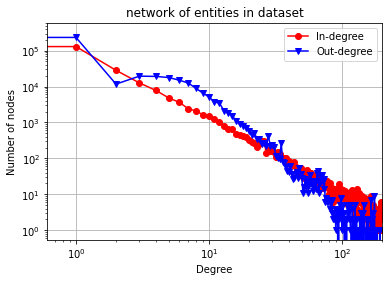

In [87]:
plt.figure() 
plt.grid(True)
plt.loglog(in_values, in_hist, 'ro-') # in-degree
plt.plot(in_values, out_hist, 'bv-') # out-degree
plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('network of entities in dataset')
plt.xlim([0, 200])


Working with undirected graph

In [89]:
G_undirect = G.to_undirected()


In [112]:
print("Average clustering coef: ", 
      nx.algorithms.approximation.clustering_coefficient.average_clustering(G_undirect))

Average clustering coef:  0.046


In [119]:
components = nx.connected_components(G_undirect)

largest_component = max(components, key=len)

print(len(largest_component)/len(G_undirect.nodes))

G_largest = G_undirect.subgraph(largest_component)


0.9297201684746379


In [129]:
# Betweenness centrality
bet_cen = nx.algorithms.centrality.betweenness_centrality(G_largest, k=25_000)

# Closeness centrality
clo_cen = nx.algorithms.centrality.closeness_centrality(G_largest, k=25_000)

# Eigenvector centrality
eig_cen = nx.algorithms.centrality.eigenvector_centrality(G_largest, k=25_000)

In [ ]:
def get_top_keys(dictionary, top):
    items = dictionary.items()
    items.sort(reverse=True, key=lambda x: x[1])
    return map(lambda x: x[0], items[:top])

In [ ]:
top_bet_cen = get_top_keys(bet_cen,10)
top_clo_cen = get_top_keys(clo_cen,10)
top_eig_cent = get_top_keys(eig_cen,10)

In [107]:
density = nx.density(G_undirect)
print("Network density:", density)

Network density: 9.21558426474675e-06


In [109]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(G_undirect))


False


In [19]:
diameter = approx_diameter(subgraph)
print("Network diameter of largest component:", diameter)

Network diameter of largest component: 21


In [ ]:
communities = community.greedy_modularity_communities(G)

## Checking the path between two nodes

In [165]:
nodes_between = nx.shortest_path(G_largest, source='name:galina-aleksandrovna', target='name:susary-g-kolpinskoe-slavanka')

In [166]:
SG = G_largest.subgraph(nodes_between)

In [167]:
nodes_between

['name:galina-aleksandrovna',
 'entity:2515137.fd7bc411c902d6ad99bca654d7e2d0fa3a3f23fc',
 'name:zao-mosekspertiza',
 'entity:103ce5e7d2b9ef0d5b7563dfee7b69d7bb58882d.25d16ce1c93f0ff97573b6df8b83e0ce9df44aa2',
 'name:susary-g-kolpinskoe-slavanka']

In [168]:
G_largest.get_edge_data("name:galina-aleksandrovna", "entity:2515137.fd7bc411c902d6ad99bca654d7e2d0fa3a3f23fc")

{':TYPE': 'PEOPLE_MENTIONED', 'weight': 0.3617021276595745}

In [169]:
G_largest.get_edge_data("entity:2515137.fd7bc411c902d6ad99bca654d7e2d0fa3a3f23fc", "name:zao-mosekspertiza")

{':TYPE': 'COMPANIES_MENTIONED', 'weight': 0.3191489361702128}

In [170]:
G_largest.get_edge_data("name:zao-mosekspertiza", "entity:103ce5e7d2b9ef0d5b7563dfee7b69d7bb58882d.25d16ce1c93f0ff97573b6df8b83e0ce9df44aa2")

{':TYPE': 'COMPANIES_MENTIONED', 'weight': 0.3191489361702128}

In [171]:
G_largest.get_edge_data("entity:103ce5e7d2b9ef0d5b7563dfee7b69d7bb58882d.25d16ce1c93f0ff97573b6df8b83e0ce9df44aa2",
                        "name:susary-g-kolpinskoe-slavanka")

{':TYPE': 'COMPANIES_MENTIONED', 'weight': 0.5531914893617021}

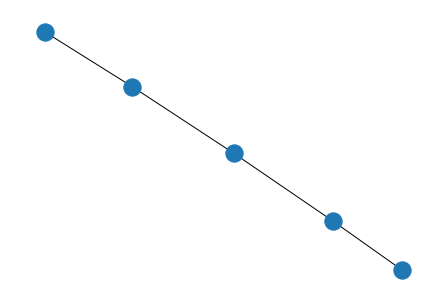

In [172]:
nx.draw(SG)

## only letters

Here we selected only those connections that arouse directly from email correspondence

In [178]:
only_email_connections = links[links[':TYPE'].isin(["INVOLVED", "ORGANIZER",
                                                   "IN_REPLY_TO_EMAIL",
                                                   "EMITTERS", "RECIPIENTS"])]

In [181]:
G_emails = nx.from_pandas_edgelist(only_email_connections, source=":START_ID", target=":END_ID", edge_attr=True,
                                   create_using=nx.DiGraph())

In [186]:
N, K = G_emails.order(), G_emails.size()
avg_deg = float(K) / N

print("Nodes: ", N)
print("Edges: ", K)
print("Average degree: ", avg_deg)
print("Number strongly connected components: ", nx.number_strongly_connected_components(G))
print("Number weakly connected components: ", nx.number_weakly_connected_components(G))

Nodes:  109826
Edges:  230844
Average degree:  2.1019066523409755
Number strongly connected components:  109826
Number weakly connected components:  1478


In [187]:
degree_dict = dict(G_emails.degree(G_emails.nodes()))
nx.set_node_attributes(G_emails, degree_dict, 'degree')


sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('entity:00bf83615941b10e7d1f1db65ec8fc7dff0c3855.794bb3bb3c338923c904dcf51312bc3564b4451e', 14054)
('entity:77ba615e5e0b6977b5eb4940199519e032dd51ef.0a45a0998943b7948332b93b5adc6eecfb58d232', 12179)
('entity:04d398b113fd81e5bb82a01d5695d39d0154cfe1.44dc765734df53b1c71c962962d15aaab5bd46a2', 9485)
('entity:10298ae990a7e7a3eee6b476b23bd2dd5db3a17b.f0dd91ef4965c1761aecb4a957724b81232424d9', 6376)
('entity:e0790774be23be176ed5745ee4eee7e01e86c668.8fb88190aac52721fdac3f639ce2f9dd3ac25867', 4657)
('entity:2f9adb72834855d02b8597114b8f91483282e585.c7a4b8774ab3b4c6f498746e876cd196b3ade3d2', 4083)
('entity:97d60bd70119334f5551b25df83f89cd35d9362b.788413048a75d523257f95133816be37b0090a5b', 4030)
('entity:b733cdc0bb3f018e3cbedb8423b51df47aa21429.06760a7bc5dfe01930a4a5e8b88b3e94d1c25e39', 4026)
('entity:2d5cebf7faddb3eecf8ae2a64ee1cb015263a50c.da13760f401a5667a26d053f3404db65cd3362ba', 3882)
('entity:676299af4f40f51ba5d90f0b43e72bbe92ffad00.b972baf162603b681a03108133da904c0

In [193]:
G_emails_undirect = G_emails.to_undirected()


In [201]:
nodes_between = nx.shortest_path(G_emails_undirect,
source='entity:10298ae990a7e7a3eee6b476b23bd2dd5db3a17b.f0dd91ef4965c1761aecb4a957724b81232424d9',
target='entity:932116cff27b7cfa5f7f87a7391283225fbb8390.0a7b25d479eeabbccf395f35b205ffcefe81a301'
)

In [202]:
nodes_between

['entity:10298ae990a7e7a3eee6b476b23bd2dd5db3a17b.f0dd91ef4965c1761aecb4a957724b81232424d9',
 'entity:2453591.ac8ef17c058984caa8d1cd3440ddd954477b9551',
 'entity:932116cff27b7cfa5f7f87a7391283225fbb8390.0a7b25d479eeabbccf395f35b205ffcefe81a301']

How many connections you need to break to remove link between those two nodes.

In [206]:
nx.node_connectivity(G_emails_undirect,
s='entity:10298ae990a7e7a3eee6b476b23bd2dd5db3a17b.f0dd91ef4965c1761aecb4a957724b81232424d9',
t='entity:932116cff27b7cfa5f7f87a7391283225fbb8390.0a7b25d479eeabbccf395f35b205ffcefe81a301'
)

133

## Also useful

Alternative with better performance for large scale data: [igraph](https://igraph.org/python/).